### Nisarg Khacharia
### Applying for Data Science Internship
### Answers of the assignment questions are written at last.

# 1.Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2.Importing Dataset

In [2]:
df = pd.read_csv('Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
X = df[['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]
y = df['isFlaggedFraud']

# 3. Selecting Independent Variables

In [4]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size = 0.8, random_state = 1)

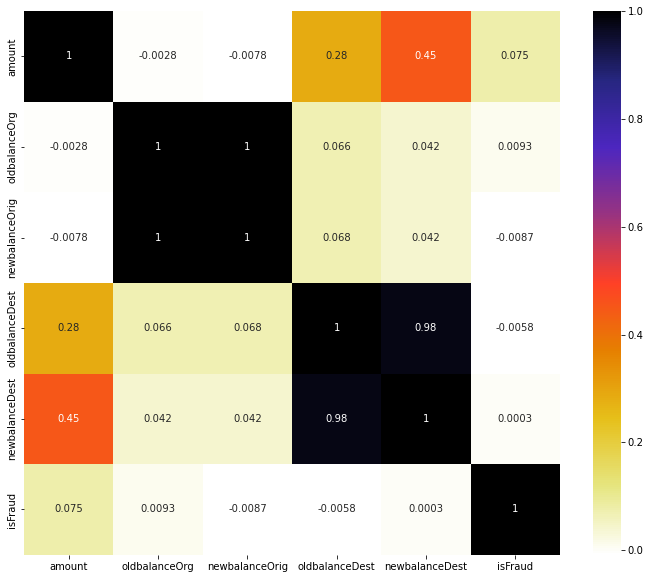

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = X_train_temp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [6]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train_temp, 0.9)
corr_features

{'newbalanceDest', 'newbalanceOrig'}

### So, I'll be dropping the above two features from the dataset

### Sender and Reciever

In [13]:
sender = df.iloc[:, 3].values
receiver = df.iloc[:, 6].values

In [14]:
sender, receiver

(array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
        'C1685995037', 'C1280323807'], dtype=object),
 array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1365125890',
        'C2080388513', 'C873221189'], dtype=object))

### Amounts

In [15]:
amount1 =   df.iloc[:, 2].values
amount2 =  df.iloc[:, 4].values
amount3 =  df.iloc[:, 7].values

In [17]:
amount1 = amount1.reshape(len(amount1),1)

In [18]:
amounts = np.column_stack((amount1, amount2, amount3))

In [19]:
amounts

array([[9.83964000e+03, 1.70136000e+05, 0.00000000e+00],
       [1.86428000e+03, 2.12490000e+04, 0.00000000e+00],
       [1.81000000e+02, 1.81000000e+02, 0.00000000e+00],
       ...,
       [6.31140928e+06, 6.31140928e+06, 6.84888400e+04],
       [8.50002520e+05, 8.50002520e+05, 0.00000000e+00],
       [8.50002520e+05, 8.50002520e+05, 6.51009911e+06]])

### Payment Type

In [20]:
p_type = df.iloc[:, 1].values

In [21]:
p_type

array(['PAYMENT', 'PAYMENT', 'TRANSFER', ..., 'CASH_OUT', 'TRANSFER',
       'CASH_OUT'], dtype=object)

### Fraud

In [22]:
isfraud = df.iloc[:, -2].values
flag_fraud = df.iloc[:, -1].values

In [23]:
isfraud, flag_fraud

(array([0, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

### Scaling the amounts

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amounts[:, :] = sc.fit_transform(amounts[:, :])
amounts[:, :] = sc.transform(amounts[:, :])

In [25]:
amounts

array([[-0.29785501, -0.28871653, -0.32381399],
       [-0.29785503, -0.28871655, -0.32381399],
       [-0.29785504, -0.28871655, -0.32381399],
       ...,
       [-0.29783773, -0.28871579, -0.32381398],
       [-0.29785271, -0.28871645, -0.32381399],
       [-0.29785271, -0.28871645, -0.32381343]])

### Encoding String Values

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
p_type = le.fit_transform(p_type)

In [27]:
p_type

array([3, 3, 4, ..., 1, 4, 1])

In [28]:
sender = le.fit_transform(sender)
receiver = le.fit_transform(receiver)

In [29]:
sender, receiver

(array([ 757869, 2188998, 1002156, ...,  533958, 2252932,  919229]),
 array([1662094, 1733924,  439685, ...,  108224,  319713,  534595]))

In [30]:
X = np.column_stack((p_type, sender, receiver, amounts, isfraud))
y = flag_fraud

In [31]:
X

array([[ 3.00000000e+00,  7.57869000e+05,  1.66209400e+06, ...,
        -2.88716529e-01, -3.23813991e-01,  0.00000000e+00],
       [ 3.00000000e+00,  2.18899800e+06,  1.73392400e+06, ...,
        -2.88716547e-01, -3.23813991e-01,  0.00000000e+00],
       [ 4.00000000e+00,  1.00215600e+06,  4.39685000e+05, ...,
        -2.88716549e-01, -3.23813991e-01,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  5.33958000e+05,  1.08224000e+05, ...,
        -2.88715793e-01, -3.23813985e-01,  1.00000000e+00],
       [ 4.00000000e+00,  2.25293200e+06,  3.19713000e+05, ...,
        -2.88716447e-01, -3.23813991e-01,  1.00000000e+00],
       [ 1.00000000e+00,  9.19229000e+05,  5.34595000e+05, ...,
        -2.88716447e-01, -3.23813427e-01,  1.00000000e+00]])

In [32]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 3.Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 1)

# 4.Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting Test Set Results

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Logistic Regression Evaluation

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [49]:
print('True Positives: {}'.format(cm[0][0]))

True Positives: 5090085


In [50]:
print('False Positives: {}'.format(cm[0][1]))


False Positives: 0


In [51]:
print('False Negatives: {}'.format(cm[1][0]))


False Negatives: 11


In [52]:
print('True Negatives: {}'.format(cm[1][1]))


True Negatives: 0


In [53]:
print('Logistic Regression Accuracy: ', (accuracy_score(y_test, y_pred)*100), '%')

Logistic Regression Accuracy:  99.99978389405622 %


# 5.Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
naibay = GaussianNB()
naibay.fit(X_train, y_train)

GaussianNB()

### Predicting Test Set Results

In [39]:
y_pred = naibay.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Naive Bayes Evaluation

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

True Positives: 5090085


In [43]:
print('True Positives: {}'.format(cm[0][0]))

True Positives: 5090085


In [44]:
print('False Positives: {}'.format(cm[0][1]))


False Positives: 0


In [45]:
print('False Negatives: {}'.format(cm[1][0]))


False Negatives: 11


In [46]:
print('True Negatives: {}'.format(cm[1][1]))


True Negatives: 0


In [41]:
print('Naive Bayes Accuracy: ', (accuracy_score(y_test, y_pred)*100), '%')

Naive Bayes Accuracy:  99.99978389405622 %
